In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('book',quiet=True)
from nltk.book import *
from nltk.tokenize import RegexpTokenizer,WordPunctTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
#목록 확인
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
#목록 중 가장 첫번째 파일 사용
data = nltk.corpus.gutenberg.raw("austen-emma.txt")
data = data[:3000]

In [4]:
len(data)

3000

In [5]:
# 단어 단위 토크나이저
tokenizer= WordPunctTokenizer() 
#WordPunctTokenizer()=띄어쓰기(공백) 단위 토크나이저
data = tokenizer.tokenize(data)

In [6]:
data

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 '

data=nltk.pos_tag(data)
- 단어의 품사까지 같이 보고 싶을 때 사용하는 토크나이저 
- 형태소 분석,품사 태깅

In [7]:
data

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 '

In [8]:
#불용어 제거
data = [each_word for each_word in data if each_word not in stopwords.words()]

In [9]:
data

['[',
 'Emma',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'rich',
 ',',
 'comfortable',
 'home',
 'happy',
 'disposition',
 ',',
 'unite',
 'blessings',
 'existence',
 ';',
 'lived',
 'twenty',
 '-',
 'years',
 'world',
 'distress',
 'vex',
 '.',
 'She',
 'youngest',
 'daughters',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 ',',
 'consequence',
 'sister',
 "'",
 'marriage',
 ',',
 'mistress',
 'house',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'died',
 'long',
 'ago',
 'indistinct',
 'remembrance',
 'caresses',
 ';',
 'place',
 'supplied',
 'excellent',
 'woman',
 'governess',
 ',',
 'fallen',
 'short',
 'mother',
 'affection',
 '.',
 'Sixteen',
 'years',
 'Miss',
 'Taylor',
 'Mr',
 '.',
 'Woodhouse',
 "'",
 'family',
 ',',
 'governess',
 'friend',
 ',',
 'fond',
 'daughters',
 ',',
 'particularly',
 'Emma',
 '.',
 'Between',
 '_them_',
 'intimacy',
 'sisters',
 '.',
 'Even',
 '

In [10]:
#단어별 언급 빈도 확인
data_cnt = Counter(data)
data_cnt2 = data_cnt.most_common(100) # 가장 많이 나온 100개 단어

In [11]:
data_cnt2

[(',', 33),
 ('.', 19),
 (';', 9),
 ('Emma', 6),
 ("'", 6),
 ('Miss', 6),
 ('Taylor', 6),
 ('--', 6),
 ('years', 5),
 ('friend', 5),
 ('The', 5),
 ('-', 4),
 ('father', 3),
 ('long', 3),
 ('governess', 3),
 ('I', 2),
 ('Woodhouse', 2),
 ('disposition', 2),
 ('She', 2),
 ('daughters', 2),
 ('Her', 2),
 ('mother', 2),
 ('affection', 2),
 ('Mr', 2),
 ('It', 2),
 ('wedding', 2),
 ('day', 2),
 ('kindness', 2),
 ('[', 1),
 ('Jane', 1),
 ('Austen', 1),
 ('1816', 1),
 (']', 1),
 ('VOLUME', 1),
 ('CHAPTER', 1),
 ('handsome', 1),
 ('clever', 1),
 ('rich', 1),
 ('comfortable', 1),
 ('home', 1),
 ('happy', 1),
 ('unite', 1),
 ('blessings', 1),
 ('existence', 1),
 ('lived', 1),
 ('twenty', 1),
 ('world', 1),
 ('distress', 1),
 ('vex', 1),
 ('youngest', 1),
 ('affectionate', 1),
 ('indulgent', 1),
 ('consequence', 1),
 ('sister', 1),
 ('marriage', 1),
 ('mistress', 1),
 ('house', 1),
 ('early', 1),
 ('period', 1),
 ('died', 1),
 ('ago', 1),
 ('indistinct', 1),
 ('remembrance', 1),
 ('caresses', 1),


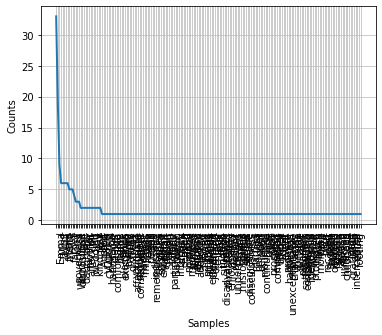

In [12]:
#집계된 단어 그래프 표시
data_graph=nltk.Text(data,name="word count")
data_graph.plot() #nltk의 기본적인 그래프 그려주는 기능
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

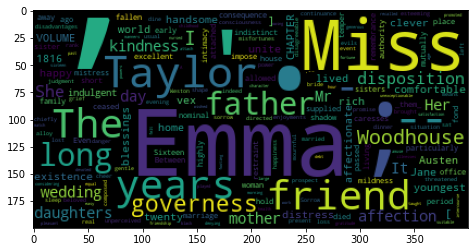

In [13]:
#워드클라우드 그리기
#포스 태깅한 단어가 들어가면 에러가 뜬다.
wordcloud = WordCloud().generate_from_frequencies(data_cnt)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.show